### Maksimasi profit untuk Produksi A dan B

Profit (A) = &euro;(180 -90)A = &euro;90 \
Profit (B) = &euro;(150 -90)B = &euro;60 \
Demand A = 3 unit/day. \
Demand B = 4 unit/day. \
\
Kapasitas produksi 8 jam/day, dengan biaya produksi &euro;20/jam. \
Produksi A membutuhkan 2 jam/unit. \
Produksi B membutuhkan 1 jam/unit. \
\
Biaya material A = &euro;50/unit.\
Biaya material B = &euro;70/unit.

Total cost per unit A dan B di atas diperoleh dari: \
cA = 50 + 2x &euro;20 = &euro;90 \
cB = 70 + 1x &euro;20 = &euro;90 




#### Rumusan matematis
$$ Max Profit = 90A + 60B $$
Constrain
$$ A <= 3 $$
$$ B <= 4 $$
$$ 2A + B <= 8  $$
$$ A, B >= 0 $$

### Definisi counterintuitive outcome
Luaran yang sebenarnya dapat diduga kejadiannya (bukan hal yang misterius, atau tidak terduga), dan dapat dijelaskan dengan melihat sistem secara komprehensif.

In [1]:
from pyomo.environ import *
# import pyomo.environ as pyo


In [3]:
model = ConcreteModel()

# Deklarasi variabel keputusan
model.A = Var(domain=NonNegativeIntegers)
model.B = Var(domain=NonNegativeIntegers)

# Deklarasi fungsi tujuan
model.profit = Objective(
    expr = 90*model.A + 60*model.B,
    sense = maximize
    )
# Deklarasi pembatas (constraints)
model.demandA = Constraint(expr = model.A <= 3) 
model.demandB = Constraint(expr = model.B <= 4)
model.hourCapacity = Constraint(expr = 2*model.A + model.B <= 8)
# Pencarian solusi (solve)
# Mode penulisan 1
# SolverFactory('cbc').solve(model).write()
# Mode penulisan 2
objSolver = SolverFactory('cbc')
Solver_cbc = objSolver.solve(model)
Solver_cbc.write()
# hasil_cbc.pprint


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -420.0
  Upper bound: -420.0
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 2
  Number of binary variables: 0
  Number of integer variables: 2
  Number of nonzeros: 2
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 


In [4]:
# Menampilkan hasil-hasil keseluruhan
model.display()
# Menampilkan tiap bagian
model.profit.display()
model.A.display()
model.B.display()

Model unknown

  Variables:
    A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   2.0 :  None : False : False : NonNegativeIntegers
    B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   4.0 :  None : False : False : NonNegativeIntegers

  Objectives:
    profit : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 420.0

  Constraints:
    demandA : Size=1
        Key  : Lower : Body : Upper
        None :  None :  2.0 :   3.0
    demandB : Size=1
        Key  : Lower : Body : Upper
        None :  None :  4.0 :   4.0
    hourCapacity : Size=1
        Key  : Lower : Body : Upper
        None :  None :  8.0 :   8.0
profit : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 420.0
A : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   2.0 :  None : False : False :

In [1]:
# display solution
print(f"Profit = {model.profit()}")
print(f"Units of A = {model.A()}")
print(f"Units of B = {model.B()}")

NameError: name 'model' is not defined

#### Membuat Grafik Matplotlib

Text(3, 6, 'B maks 4, A = 2')

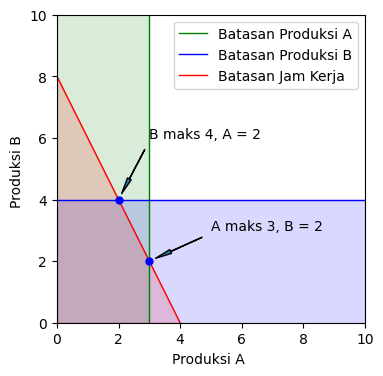

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import sys
# import os.path

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_aspect('equal')
ax.axis([0, 10, 0, 10])
ax.set_xlabel('Produksi A ')
ax.set_ylabel('Produksi B ')

# Garis Batasan demand A
ax.plot([3, 3], [0, 10], 'g', lw=1) # untuk setiap nilai x dari 3 s.d. 3, y bernilai 0 s.d. 10
# Garis Batasan demand B
ax.plot([0, 10], [4, 4], 'b', lw=1) # untuk setiap nilai x dari 0 s.d. 10, y selalu bernilai 4

# Garis Batasan jam kerja per hari
x = np.array([0, 10])
ax.plot(x, 8 - 2*x, 'r', lw=1)  # untuk setiap nilai x, y = 8 -2x

ax.legend(['Batasan Produksi A', 'Batasan Produksi B', 'Batasan Jam Kerja'])
# Menggunakan plot fill_between step (dari nilai a s.d. b)
ax.fill_between([0, 3], [10, 10], color='g', alpha=0.15) # 
ax.fill_between([0, 10], [4, 4], color='b', alpha=0.15)
ax.fill_between([0, 4],[8, 0], color='r', alpha=0.15)  # ketika x=0, y=8 dst berwarna red dgn alpha 0,15

# mendefiniskan ukuran garis berpanah    
ukuranpanah = dict(shrink=.1, width=0.1, headwidth=3)

# Alternatif Solusi
ax.plot(3, 2, 'b.', ms=10) # pada titik (3,2), warna biru, ukuran titik 10 point
ax.annotate('A maks 3, B = 2', xy=(3, 2), xytext=(5, 3), arrowprops=ukuranpanah)

ax.plot(2, 4, 'b.', ms=10)
ax.annotate('B maks 4, A = 2', xy=(2, 4), xytext=(3, 6), arrowprops=ukuranpanah)

# fname = 'Pemod01.png'
# fname = os.path.join('figures', fname) if os.path.exists('figures') else fname
# plt.savefig(fname, bbox_inches='tight')